In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/CS21B2028/PR-ML Lab/datasets'

In [2]:
dataset = pd.read_csv("iris.csv")
X = dataset.iloc[:,1:3].values
y = dataset.iloc[:,-1].values

print(X[0,0])
print(X.shape)
print(y)

5.1
(150, 2)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Ir

In [3]:

#Calculate the pairwise Euclidean distances between data points using the selected features
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

m = X.shape[0]
n = X.shape[1]
D = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        D[i,j] = euclidean_distance(X[i], X[j])

print(D)



[[0.         0.53851648 0.5        ... 1.48660687 1.1045361  0.94339811]
 [0.53851648 0.         0.28284271 ... 1.6        1.36014705 1.        ]
 [0.5        0.28284271 0.         ... 1.81107703 1.5132746  1.21655251]
 ...
 [1.48660687 1.6        1.81107703 ... 0.         0.5        0.6       ]
 [1.1045361  1.36014705 1.5132746  ... 0.5        0.         0.5       ]
 [0.94339811 1.         1.21655251 ... 0.6        0.5        0.        ]]


In [6]:
def kruskal_mst(D):
    nodes = D.shape[0]
    edges = [(i,j,D[i,j]) for i in range(nodes) for j in range(i+1,nodes)]
    #sort edges by weight
    edges.sort(key=lambda x:x[2])
    #print(edges)

    mst_edges = []

    disjoint_sets = [{i} for i in range(nodes)]

    for edge in edges:
        #print(edge)
        u = edge[0]
        v = edge[1]
        w = edge[2]

        u_set = None
        v_set = None

        for s in disjoint_sets:
            if u in s:
                u_set = s
            if v in s:
                v_set = s

        if u_set != v_set:
            mst_edges.append(edge)
            disjoint_sets.remove(u_set)
            disjoint_sets.remove(v_set)
            disjoint_sets.append(u_set.union(v_set))

        if len(mst_edges) == nodes-1:
            break

    return mst_edges
    

    


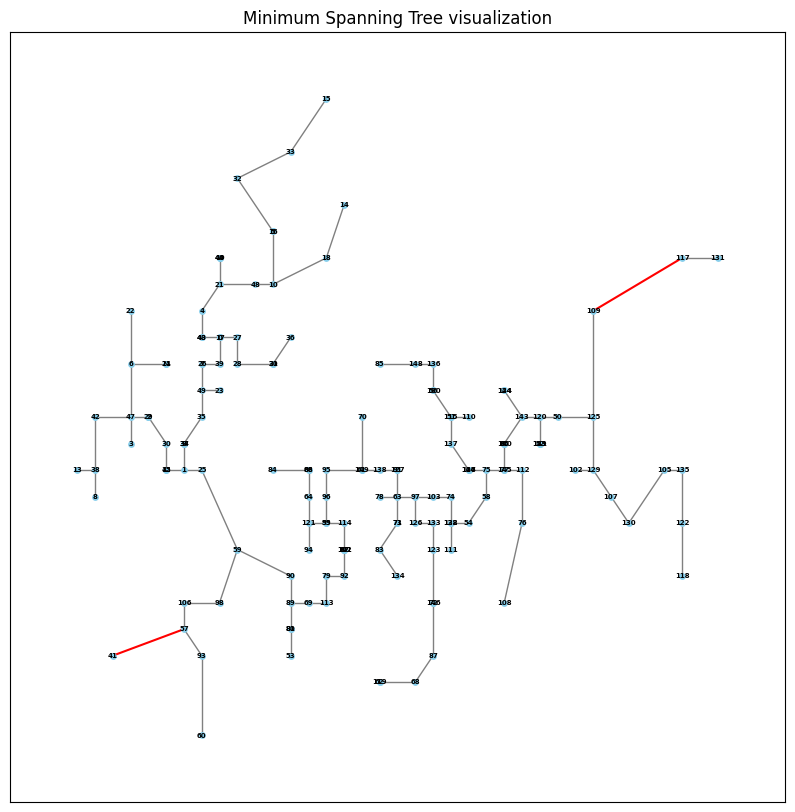

In [8]:

mst_edges = kruskal_mst(D)
# Create a graph and add nodes with specified coordinates
G = nx.Graph()
for node in range(len(X)):
    G.add_node(node, pos=(X[node, 0], X[node, 1]))

# Add weighted edges to the graph
G.add_weighted_edges_from(mst_edges)

# Get node positions for visualization
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
plt.figure(figsize=(10, 10))

# Draw edges in gray
nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:-2], edge_color='gray', width=1.0)

# Draw last two edges in red 
nx.draw_networkx_edges(G, pos, edgelist=[mst_edges[-2], mst_edges[-1]], edge_color='red', width=1.5)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=5, font_weight='bold')

plt.title("Minimum Spanning Tree visualization")
plt.show()


[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {41}, {131, 117}]
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1

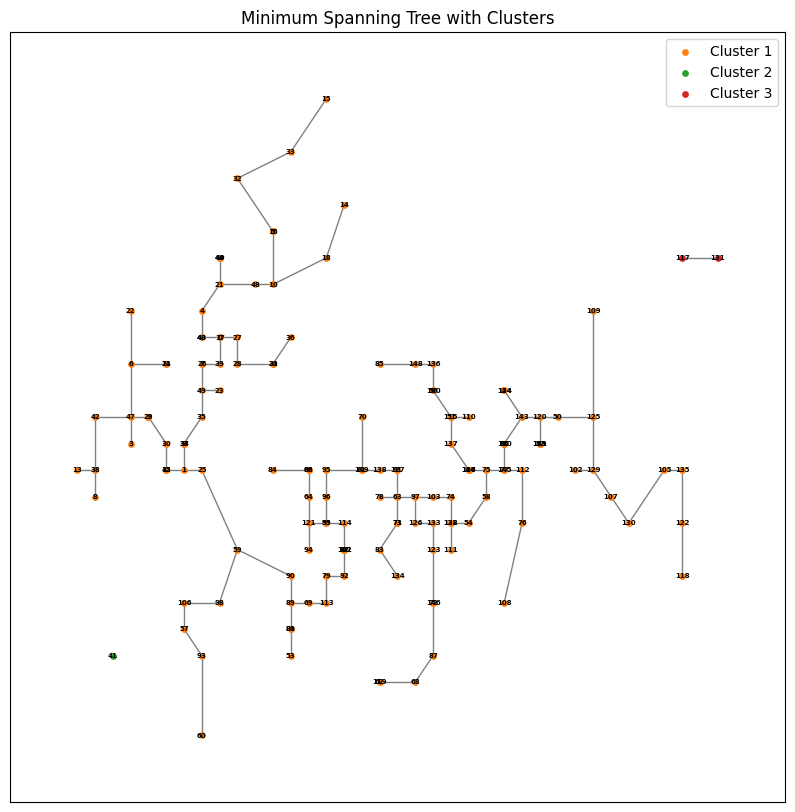

In [9]:

# Create a graph and add nodes with specified coordinates
G = nx.Graph()
for node in range(len(X)):
    G.add_node(node, pos=(X[node, 0], X[node, 1]))

# Add weighted edges to the graph
G.add_weighted_edges_from(mst_edges)

# Create a list of edges to remove for cluster creation
edges_to_remove = [mst_edges[-1], mst_edges[-2]]  # Remove the last two edges

# Remove the specified edges from the graph
G.remove_edges_from(edges_to_remove)

# Perform connected component analysis to identify clusters
clusters = list(nx.connected_components(G))
print(clusters)

# Assign a cluster label to each node
node_cluster_mapping = {}
for idx, cluster in enumerate(clusters,1):
    for node in cluster:
        node_cluster_mapping[node] = idx

print(node_cluster_mapping)

# Get node positions for visualization
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph with cluster colors
plt.figure(figsize=(10, 10))
for idx, cluster in enumerate(clusters):
    node_list = list(cluster)
    print(node_list)
    nx.draw_networkx_nodes(G,pos,nodelist=node_list,node_size=15,node_color=f'C{idx + 1}',label=f'Cluster {idx + 1}')

nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.0)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=5, font_weight='bold')

plt.title("Minimum Spanning Tree with Clusters")
plt.legend()
plt.show()
